In [4]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

['1.ipynb', 'data1.xlsx', 'data1.csv', 'New Folder', '.ipynb_checkpoints']


In [5]:
dataset = pd.read_csv("data1.csv")

In [91]:
type(dataset)

pandas.core.frame.DataFrame

In [92]:
dataset.shape

(24, 25)

In [93]:
dataset.head(5)

,patients_no,age,sex,occupation,family_history,who,smoking,drink,obesity,diet,...,position_edema,clubbing,bp_systolic,bp_diastolic,heart_rate,diabetes,blood_sugar_level,serum_cholesterol,ecg,target
0,1,37,1,3,1,1,1,0,0,0,...,0,1,150,95,65,0,103,225,1,1
1,2,48,1,5,0,0,1,0,0,0,...,0,0,127,80,75,0,70,245,0,0
2,3,63,1,4,1,1,0,0,1,1,...,0,0,138,71,60,0,85,205,1,1
3,4,39,1,2,1,1,0,0,1,1,...,0,0,106,70,80,0,77,195,0,0
4,5,46,1,3,0,0,0,0,1,1,...,0,0,121,81,95,0,76,250,0,0


In [94]:
dataset.sample(5)

,patients_no,age,sex,occupation,family_history,who,smoking,drink,obesity,diet,...,position_edema,clubbing,bp_systolic,bp_diastolic,heart_rate,diabetes,blood_sugar_level,serum_cholesterol,ecg,target
14,15,32,0,6,0,0,0,0,0,1,...,2,0,145,85,75,1,130,240,0,1
13,14,35,0,2,0,0,1,1,0,0,...,0,0,150,89,78,0,180,220,1,1
8,9,25,1,1,1,1,1,0,0,0,...,0,0,125,80,80,0,70,220,0,0
17,18,35,1,3,1,1,1,1,1,0,...,2,1,196,90,75,1,120,280,1,1
21,22,49,1,2,1,3,1,0,1,1,...,0,0,160,92,70,1,180,220,1,1


In [95]:
dataset.describe()

,patients_no,age,sex,occupation,family_history,who,smoking,drink,obesity,diet,...,position_edema,clubbing,bp_systolic,bp_diastolic,heart_rate,diabetes,blood_sugar_level,serum_cholesterol,ecg,target
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,...,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,12.50,41.92,0.75,3.42,0.71,1.25,0.54,0.12,0.67,0.46,...,0.42,0.21,146.96,86.08,76.17,0.58,126.58,234.08,0.42,0.62
std,7.07,9.70,0.44,1.77,0.46,1.39,0.51,0.34,0.48,0.51,...,0.83,0.41,22.97,6.71,7.97,0.50,53.25,21.59,0.50,0.49
min,1.00,22.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,106.00,70.00,60.00,0.00,70.00,195.00,0.00,0.00
25%,6.75,35.00,0.75,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,127.75,80.75,72.00,0.00,76.75,220.00,0.00,0.00
50%,12.50,42.50,1.00,3.00,1.00,1.00,1.00,0.00,1.00,0.00,...,0.00,0.00,147.50,89.50,75.00,1.00,120.00,235.00,0.00,1.00
75%,18.25,49.00,1.00,5.25,1.00,1.25,1.00,0.00,1.00,1.00,...,0.00,0.00,155.25,90.00,78.50,1.00,180.00,241.25,1.00,1.00
max,24.00,63.00,1.00,6.00,1.00,6.00,1.00,1.00,1.00,1.00,...,2.00,1.00,206.00,95.00,95.00,1.00,220.00,280.00,1.00,1.00


In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 25 columns):
patients_no            24 non-null int64
age                    24 non-null int64
sex                    24 non-null int64
occupation             24 non-null int64
family_history         24 non-null int64
who                    24 non-null int64
smoking                24 non-null int64
drink                  24 non-null int64
obesity                24 non-null int64
diet                   24 non-null int64
physical_activity      24 non-null int64
stress                 24 non-null int64
chest_pain_type        24 non-null int64
previous_chest_pain    24 non-null int64
edema                  24 non-null int64
position_edema         24 non-null int64
clubbing               24 non-null int64
bp_systolic            24 non-null int64
bp_diastolic           24 non-null int64
heart_rate             24 non-null int64
diabetes               24 non-null int64
blood_sugar_level      24 non-null i

In [ ]:
info = ["age","1: male, 2: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

In [97]:
dataset["target"].describe()

count   24.00
mean     0.62
std      0.49
min      0.00
25%      0.00
50%      1.00
75%      1.00
max      1.00
Name: target, dtype: float64

In [98]:
dataset["target"].unique()

array([1, 0])

In [99]:
# Checking correlation between columns¶
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target                1.00
previous_chest_pain   0.75
ecg                   0.65
bp_systolic           0.58
diabetes              0.57
bp_diastolic          0.56
stress                0.45
position_edema        0.40
edema                 0.40
patients_no           0.37
blood_sugar_level     0.36
chest_pain_type       0.33
drink                 0.29
age                   0.24
who                   0.24
clubbing              0.19
serum_cholesterol     0.17
smoking               0.15
family_history        0.12
heart_rate            0.12
occupation            0.09
physical_activity     0.07
sex                   0.05
diet                  0.02
obesity               0.00
Name: target, dtype: float64


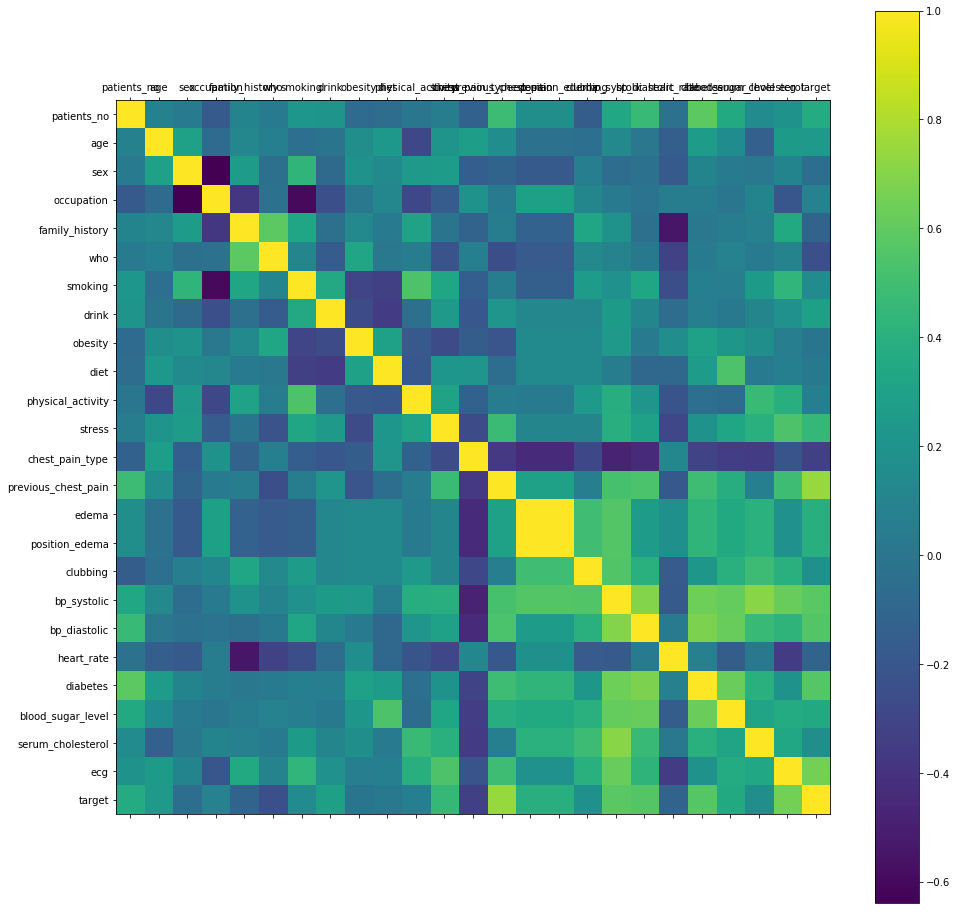

In [100]:
rcParams['figure.figsize'] = 20, 20
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa35cfdb4a8>,
      dtype=object)

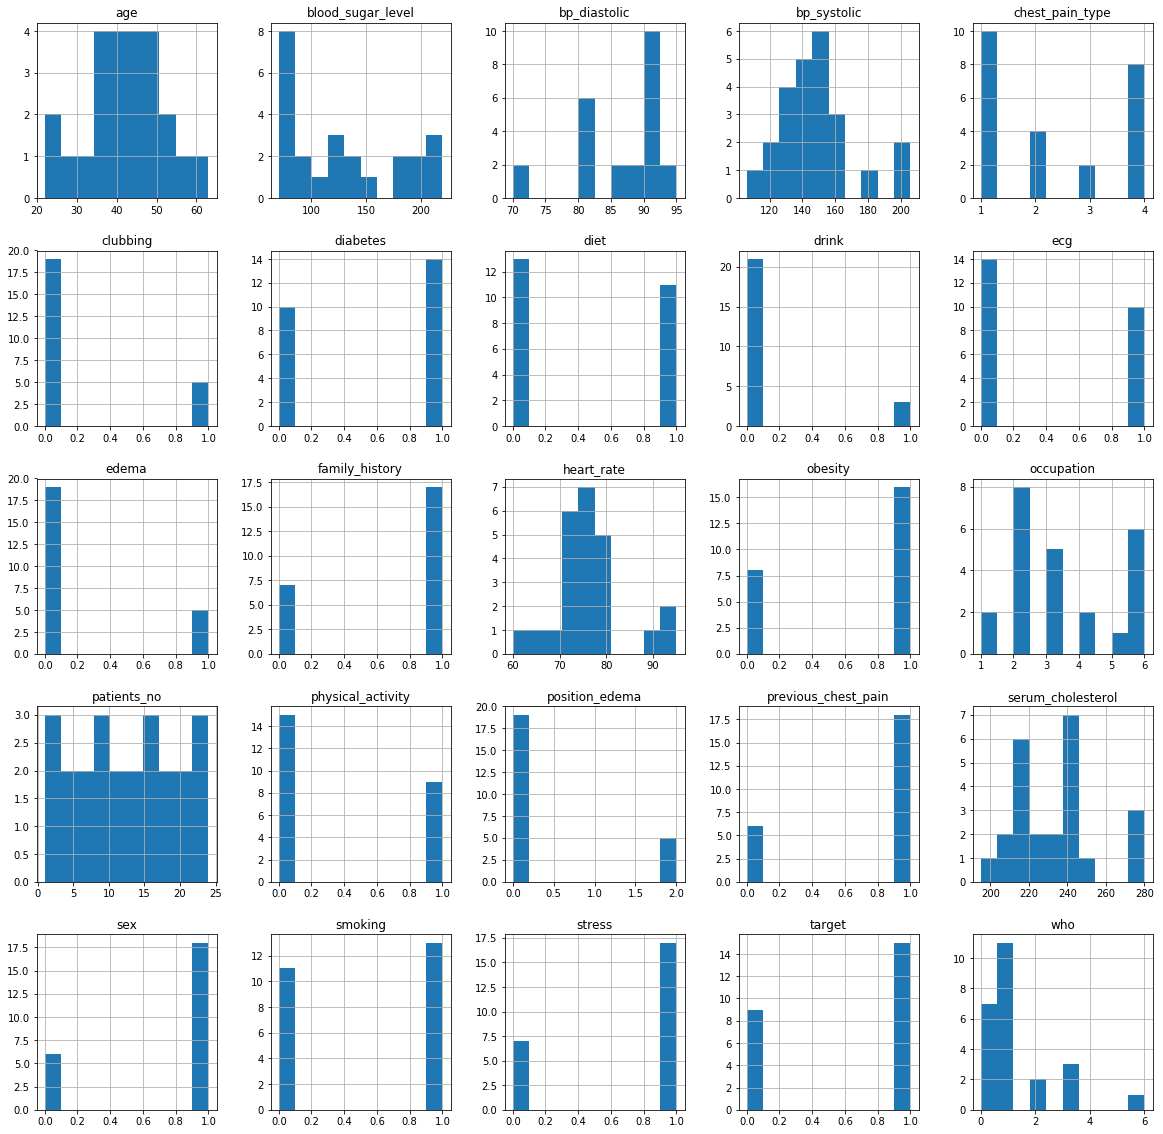

In [101]:
dataset.hist()

1    15
0     9
Name: target, dtype: int64


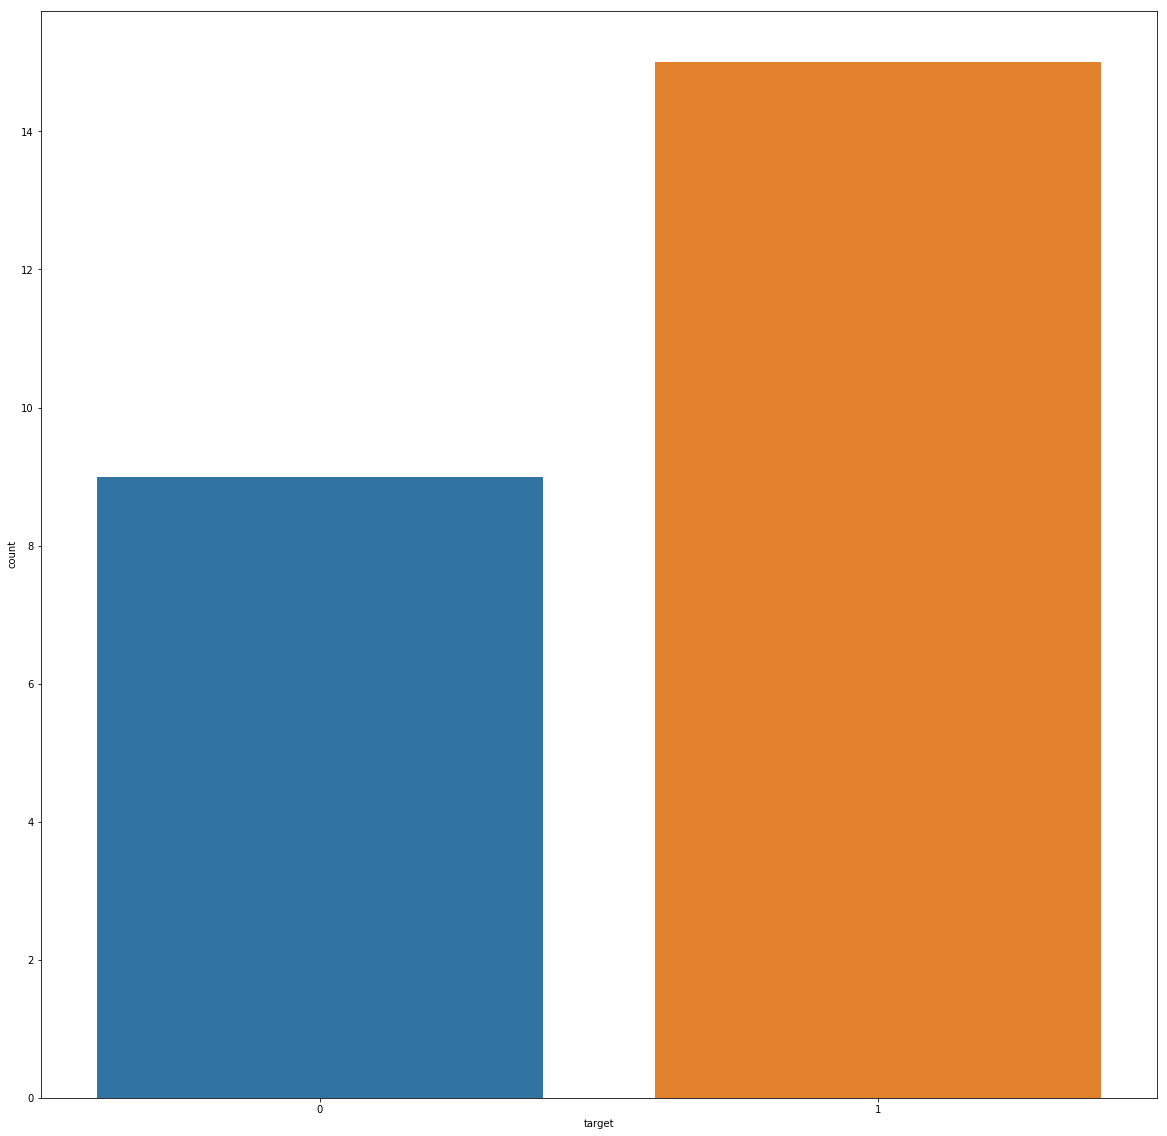

In [105]:
y = dataset["target"]
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

In [106]:
print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/24))
print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/24))

Percentage of patience with heart problems: 62.5
Percentage of patience with heart problems: 37.5


In [107]:
dataset["age"].unique()

array([37, 48, 63, 39, 46, 35, 40, 25, 22, 51, 49, 45, 32, 29, 55, 50])

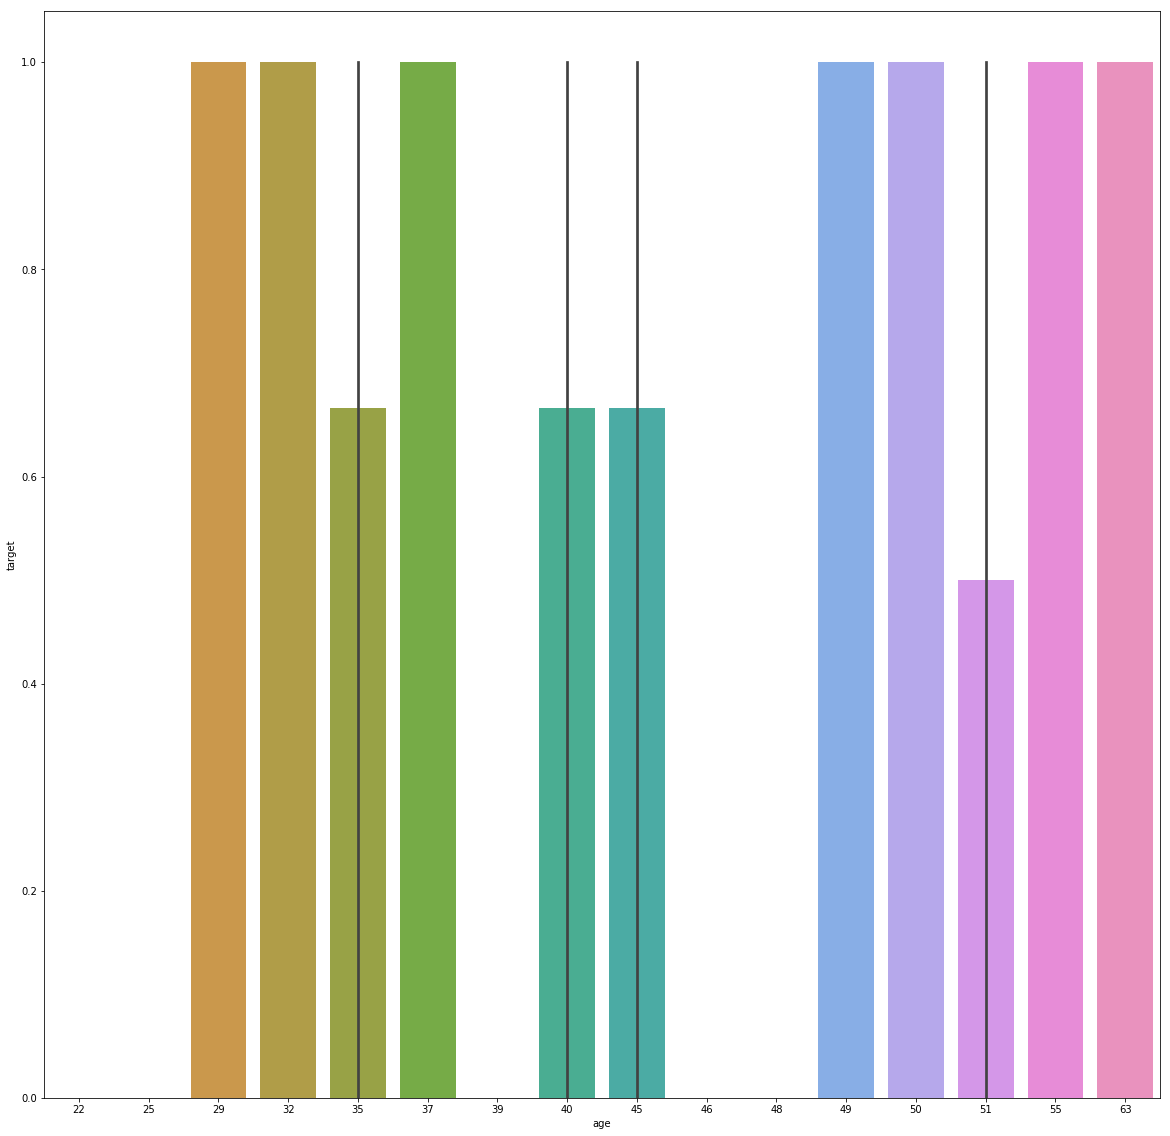

In [108]:
sns.barplot(dataset["age"],y)

In [109]:
dataset["sex"].unique()

array([1, 0])

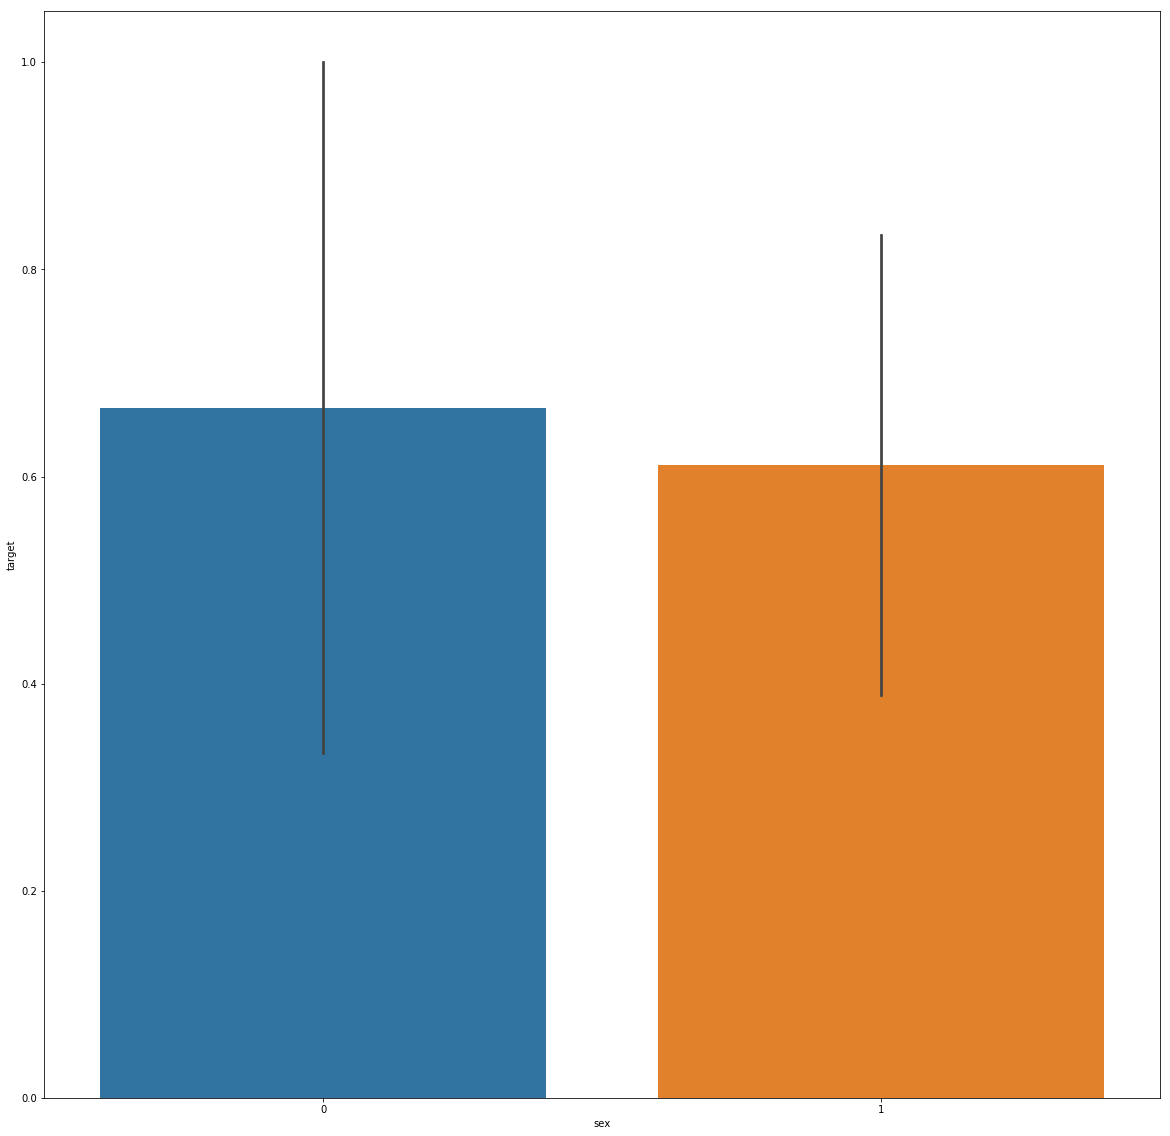

In [110]:
sns.barplot(dataset["sex"],y)

In [111]:
dataset["occupation"].unique()

array([3, 5, 4, 2, 6, 1])

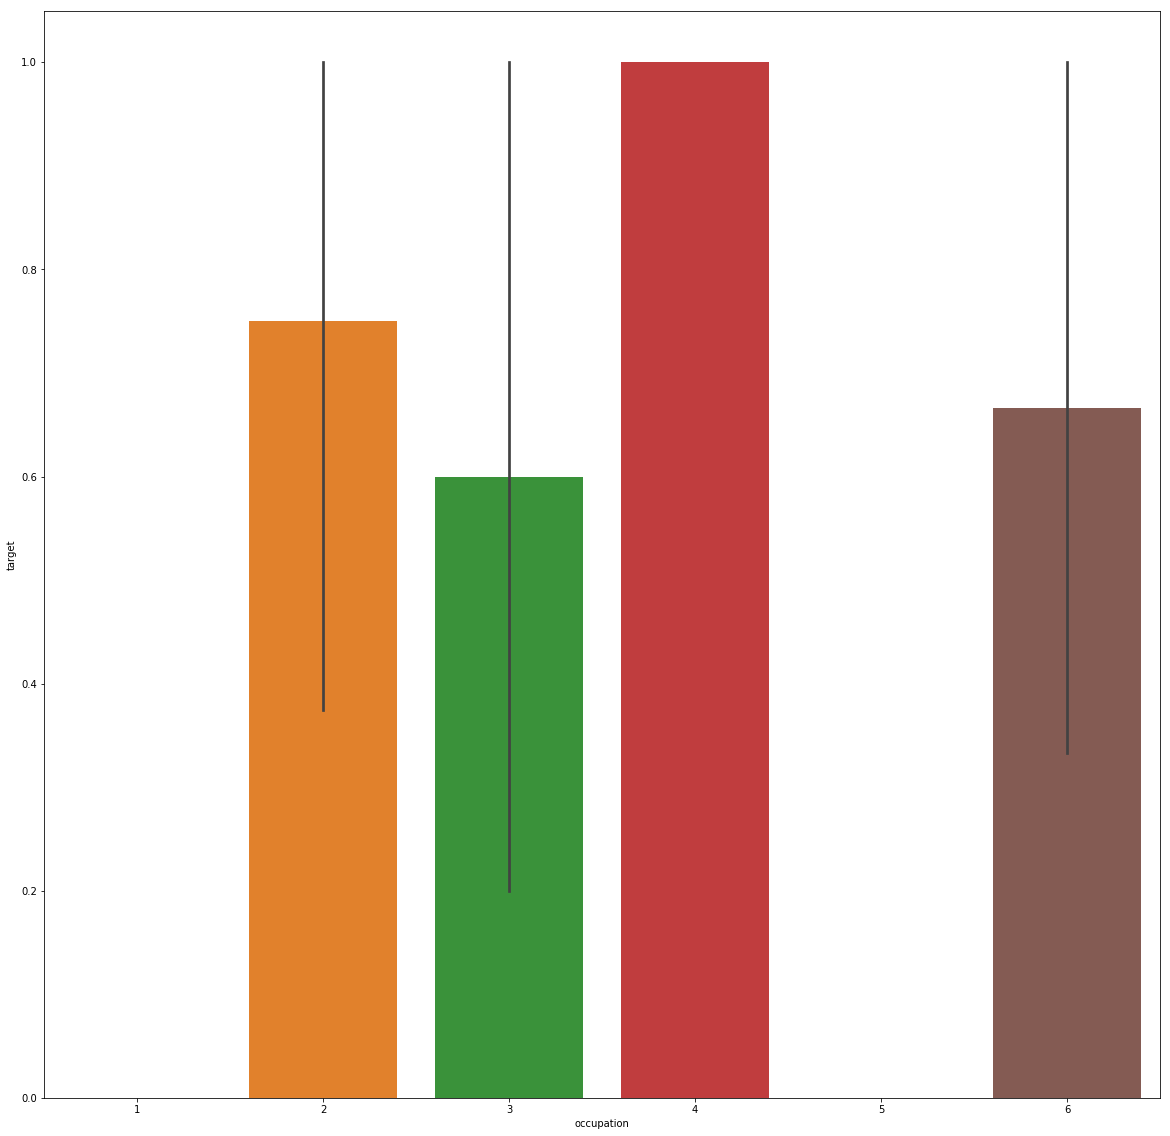

In [112]:
sns.barplot(dataset["occupation"],y)

In [113]:
dataset["family_history"].unique()

array([1, 0])

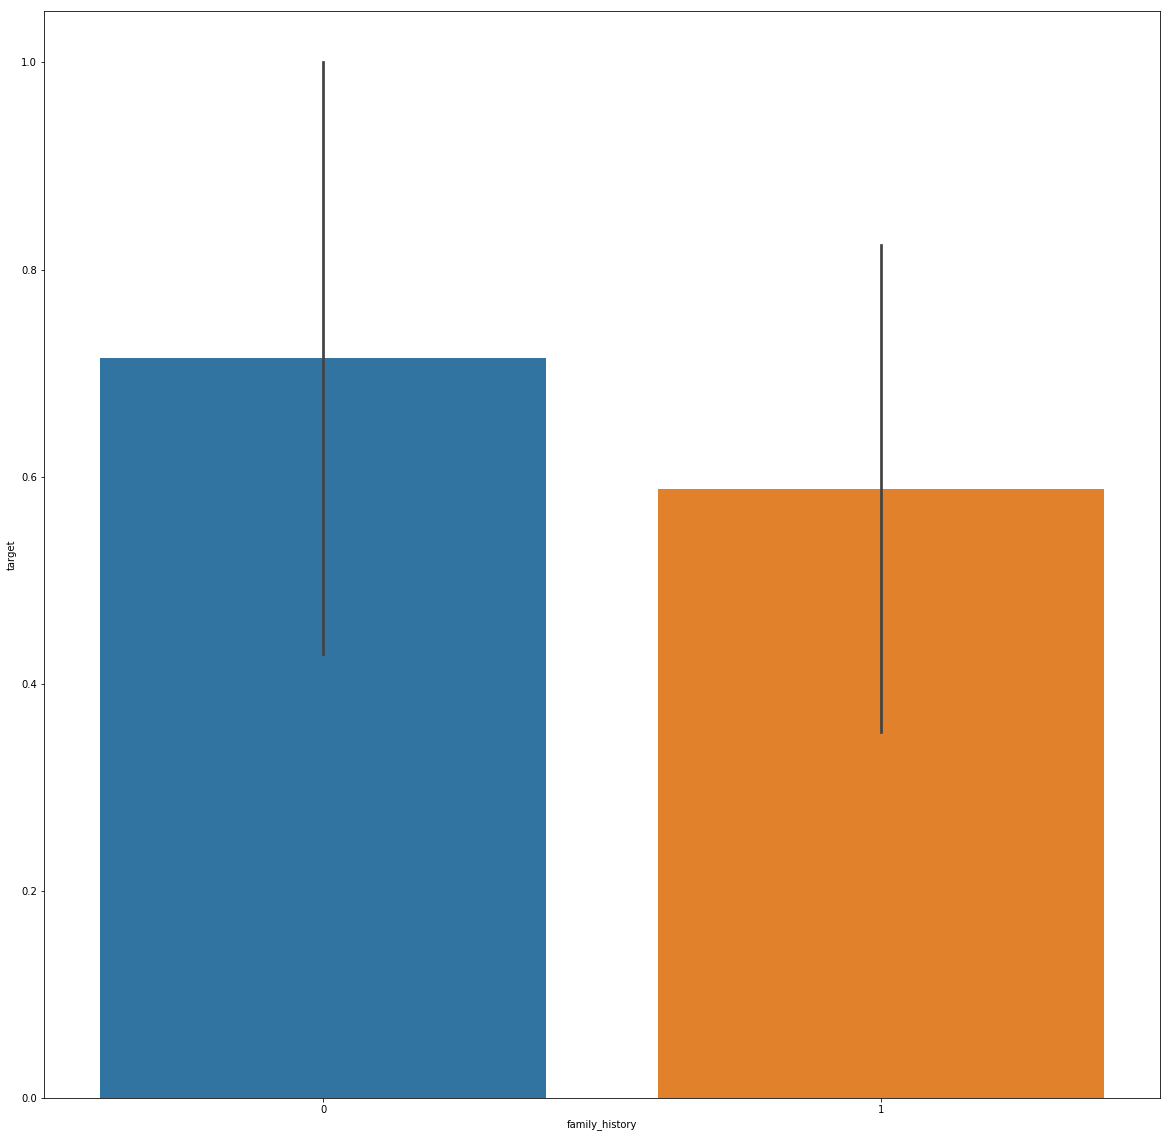

In [114]:
sns.barplot(dataset["family_history"],y)

In [115]:
dataset["smoking"].unique()

array([1, 0])

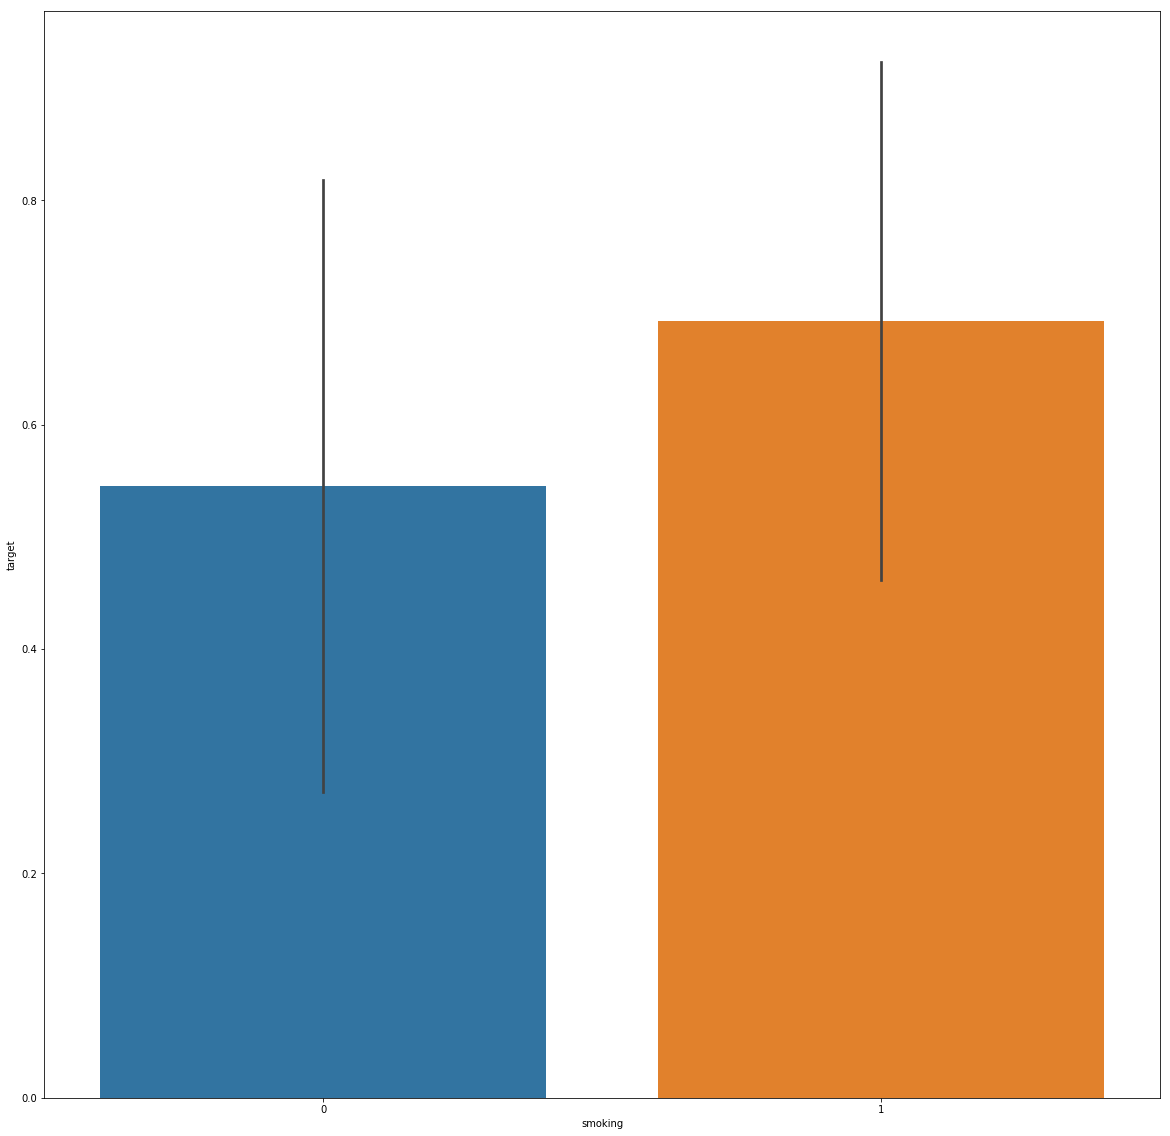

In [116]:
sns.barplot(dataset["smoking"],y)

In [117]:
dataset["drink"].unique()

array([0, 1])

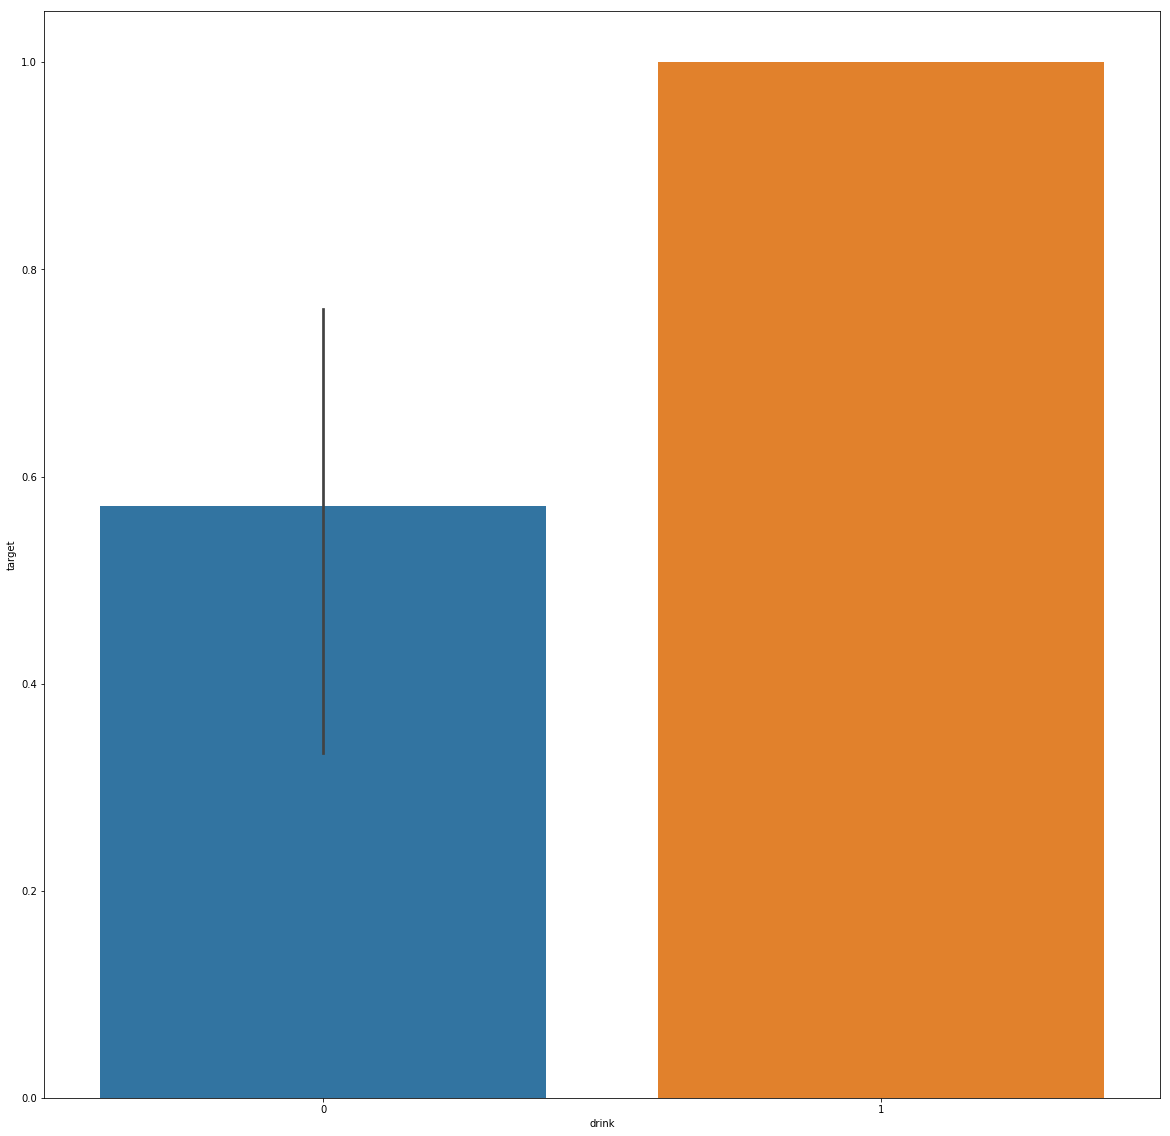

In [118]:
sns.barplot(dataset["drink"],y)

In [29]:
dataset["chest_pain_type"].unique()

array([1, 4, 3, 2])

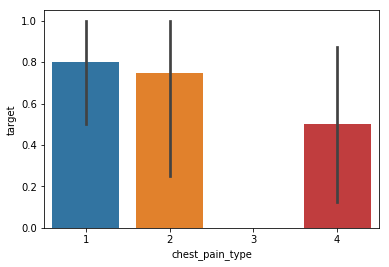

In [36]:
sns.barplot(dataset["chest_pain_type"],y)

In [16]:
dataset["blood_sugar_level"].describe()

count     24.000000
mean     126.583333
std       53.249141
min       70.000000
25%       76.750000
50%      120.000000
75%      180.000000
max      220.000000
Name: blood_sugar_level, dtype: float64

In [17]:
dataset["blood_sugar_level"].unique()

array([103,  70,  85,  77,  76, 215, 220, 210, 190, 180, 130,  90, 120,
       126, 140,  80, 156])

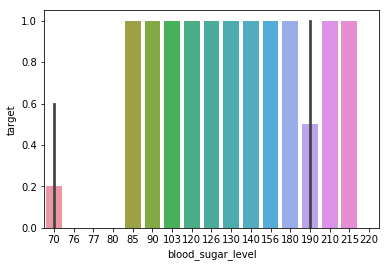

In [18]:
sns.barplot(dataset["blood_sugar_level"],y)


In [19]:
dataset["heart_rate"].unique()

array([65., 75., 60., 80., 95., 76., 72., 78., nan, 70.])

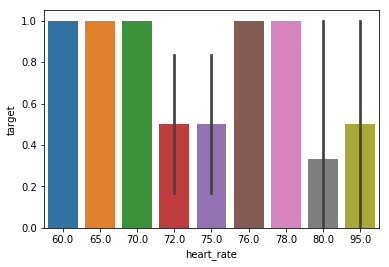

In [20]:
sns.barplot(dataset["heart_rate"],y)

In [37]:
dataset["diabetes"].unique()


array([0, 1])

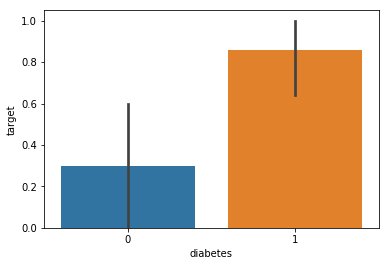

In [38]:
sns.barplot(dataset["diabetes"],y)

In [76]:
# Prediction Process

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [120]:
X_train.shape

(19, 24)

In [121]:
X_test.shape

(5, 24)

In [122]:
Y_train.shape

(19,)

In [43]:
Y_test.shape

(5,)

In [7]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)


In [10]:
print(Y_test)
print(Y_pred_lr) #.shape

11    1
10    0
22    0
14    1
20    1
Name: target, dtype: int64
[0 1 1 1 1]


In [126]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 40.0 %


In [131]:
# K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)



In [132]:
Y_pred_knn.shape

(5,)

In [133]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 80.0 %


In [127]:
# SVM

from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)



In [128]:
Y_pred_svm.shape

(5,)

In [129]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 40.0 %
